# Logistics - (Reinforcement Learning)

Using Reinforcement learning trying to identify the efficient path from source to destination. This can be used in transportation industry to eliminate the delay and fuel cost.

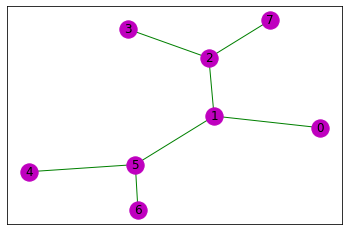

In [1]:
import numpy as np
import pylab as plt
import networkx as nx
 
#Initializing points
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
 
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'}
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='m')
nx.draw_networkx_edges(G,pos,edge_color='g')
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
NO_OF_POINTS = 8
 
#Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1
 
for point in points_list:
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0
 
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        R[point[::-1]]= 0

print(R)

[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 150.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]]


In [22]:
# Assign the destination value
R[goal,goal]= 150
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [45]:
Q = np.matrix(np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
 
# The learning parameter
gamma = 0.8
 
initial_state = 1
 
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
available_act = available_actions(initial_state)
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
 
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

print(update(initial_state, action, gamma))

max_value 0.0
0


In [48]:
scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)
 
# Testing
current_state = 0
steps = [current_state]
 
while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
 
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

max_value 383.99991706657045
Score: 982.7196928918629
max_value 383.99968363407265
Score: 982.7196928918629
max_value 383.99991706657045
Score: 982.7196928918629
max_value 479.99989633321303
Score: 982.7197317972846
max_value 383.99968363407265
Score: 982.7197317972846
max_value 749.9999170665704
Score: 982.719707394957
max_value 307.19974690725815
Score: 982.719707394957
max_value 599.9998704165163
Score: 982.7197171137194
max_value 307.19974690725815
Score: 982.7197171137194
max_value 383.99968363407265
Score: 982.7197171137194
max_value 383.99968363407265
Score: 982.7197171137194
max_value 383.99968363407265
Score: 982.7197171137194
max_value 599.9998704165163
Score: 982.7197171137194
max_value 479.99989633321303
Score: 982.7197171137194
max_value 307.19974690725815
Score: 982.7197171137194
max_value 383.99968363407265
Score: 982.7197171137194
max_value 599.9998704165163
Score: 982.7197171137194
max_value 479.99989633321303
Score: 982.7197171137194
max_value 383.99968363407265
Score

In [49]:
print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]
